# <center style="color:#B40431">TP2:Interpolation Numérique</center>


# <span style="color:#2F977B">Exercice1 


# 1)

**<span style="color:#003194">Version python:fonction de lagrange**

In [21]:
from numpy import prod
def prog(x,y,c):
    S = [] 
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
        S.append(y[j]*prod(L))
        
    return  sum(S)

In [22]:
X=[1 ,2 ,3 ,4,-2];
Y=[-1, 0, 2 ,1,3];
for i in X:
    print(prog(X,Y,i))
sum(X)

-1.0
0.0
2.0
1.0
3.0


8

In [23]:
x=[1, 2, 3, 4]
y=[-1, 0, 2, 1]
for i in x:
    print(prog(x,y,i))

-1.0
0.0
2.0
1.0


**Que renvoie la fonction PR lorsqu'on lui déclare x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n)) et y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n)) deux vecteurs de même longueur n et c un nombre réel donné? ==> La fonction PR renvoi les valeurs du vecteur Y**

# 2)


In [24]:
def pg(x,y,c):
    S = [] 
    n = len(x)
    for c in x:
            for j in range(n):
                L =[c-xx for xx in x]
                for k in range(n):
                    if (k == j):                
                        L[k] = 1
                    else:
                        L[k] = L[k]/(x[j] - x[k])   
                S.append(y[j]*prod(L))

            return L[3]

In [25]:
x=[1,2,3,4]
y=[-1,0,2,1]
for i in x:
    print(pg(x,y,i))

1
1
1
1


# 3)


**<span style="color:#003194 ">Ce programme permet de dessiner le graphe du polynôme de Lagrange de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$**

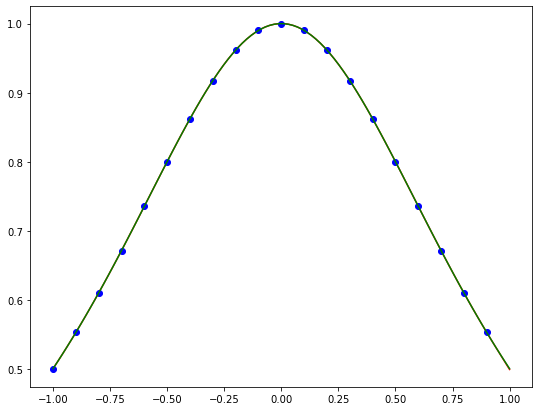

In [26]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-1,1,0.1) 
f1 = lambda x: 1/(1+x**2) 
y=f1(x)
pt=[]
t=np.linspace(-1,1,100)
fig = plt.figure(1, figsize=(9, 7))
for u in range(len(t)):
    pt.append(prog(x,y,t[u]))
plt.plot(t,pt,'r',x,y,'bo',t,f1(t),'g') 
plt.show()

### <span style="color:#FF336B ">Observation 

**Cette figure représente le graphe du polynôme de Lagrange de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux point -1 jusqu’à 1 avec un pas 0.1.
En effet,on remarque que d'aprés ce graphe: l’image du -1  et 1 est égal à 0.5 et l’image du 0 est égale à 1.**

**C’est exactement le même résultat lorsqu’on les calcule mathématiquement ( par la fonction):
Si x=-1 => f(-1)= 0.5 , 
si x=1 => f(1)=0.5 
et si x=0 => f(0)=1**

**Donc les résultats qu’on a dégagés graphiquement sont les mêmes résultats qu’on a trouvés mathématiquement en remplaçant la valeur de x dans la fonction f(x)**


# 4) 

On considère la fonction $F$ suivante :$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

# 4.1)

**<span style="color:#003194 ">Représenter sur un même graphe la fonction $F$ et $p_n$, où $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux points $x_0,\,\ldots,\,x_n$**

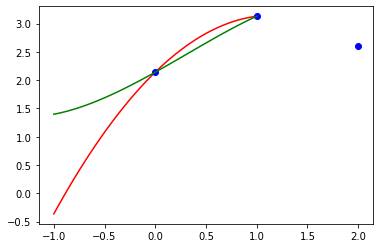

In [27]:
x=np.linspace(0,2,3) 
import math
f=lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
t=np.linspace(-1,1,100)
y=[f(xx) for xx in x]
pt=[]
for u in range (len(t)):
    pt.append(prog(x,y,t[u]))
y2=[f(tt) for tt in t]
plt.plot(t,pt,'r',x,y,'bo',t,y2,'g')
plt.show()

### <span style="color:#FF336B ">Observation:

**Cette figure représente sur le même graphe la fonction F représenté en vert et Pn qui est le polynôme d'interpolation de Lagrange de  F  aux points $x_0,x_1,x_2$ représenté en rouge**

# 4)  4.2)

**<span style="color:#003194">Tracer la courbe d'erreur (la fonction $F-p_n$)**

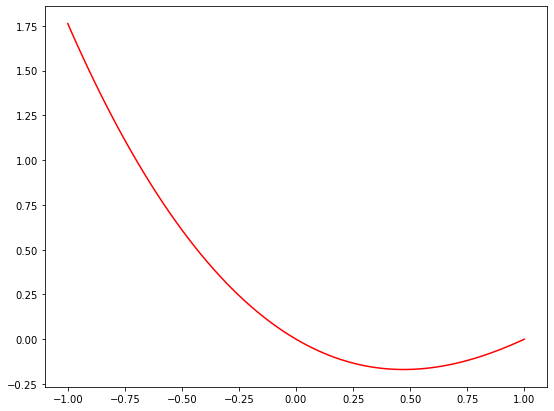

In [28]:
x=np.linspace(0,2,3) 
import math
f2=lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)

t=np.linspace(-1,1,100)
y3=[f2(xx) for xx in x]
pn=[]
for u in range (len(t)):
    pn.append(prog(x,y,t[u]))
y3=[f(tt) for tt in t]
fig = plt.figure(1, figsize=(9, 7))
plt.plot(t,np.array(y3)-np.array(pn),'r')
plt.show()

### <span style="color:#FF336B ">Observation:

**Cette figure représente sur la courbe d'erreur de la fonction $F-p_n$ .Il s'agit d'une courbe décroissante**

# <span style="color:#2F977B">Exercice2 (Phenomène de Runge) :


# 1)


**<span style="color:#003194">Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$, en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$**

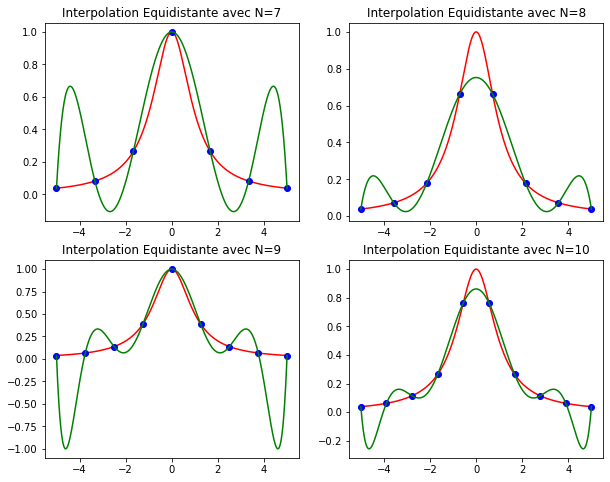

In [29]:
n=7
x=np.linspace(-5,5,n)
F=lambda x: 1/(1+x**2)
fig = plt.figure(1, figsize=(10, 8))
y=[F(xx) for xx in x]
p=np.polyfit(x,y,n-1)
t=np.linspace(-5,5,1000)
plt.subplot(221)
plt.plot(t,F(t),'r',x,y,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Equidistante avec N=7')
##############################
n=8
x=np.linspace(-5,5,n)
F=lambda x: 1/(1+x**2)
fig = plt.figure(1, figsize=(10, 8))
y=[F(xx) for xx in x]
p=np.polyfit(x,y,n-1)
t=np.linspace(-5,5,1000)
plt.subplot(222)
plt.plot(t,F(t),'r',x,y,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Equidistante avec N=8')
##############################
n=9
x=np.linspace(-5,5,n)
F=lambda x: 1/(1+x**2)
fig = plt.figure(1, figsize=(10, 8))
y=[F(xx) for xx in x]
p=np.polyfit(x,y,n-1)
t=np.linspace(-5,5,1000)
plt.subplot(223)
plt.plot(t,F(t),'r',x,y,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Equidistante avec N=9')
##############################
n=10
x=np.linspace(-5,5,n)
F=lambda x: 1/(1+x**2)
fig = plt.figure(1, figsize=(10, 8))
y=[F(xx) for xx in x]
p=np.polyfit(x,y,n-1)
t=np.linspace(-5,5,1000)
plt.subplot(224)
plt.plot(t,F(t),'r',x,y,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Equidistante avec N=10')
plt.show()



### <span style="color:#FF336B ">Observation:


**On remarque que dans les trois courbes lorsque N=7,8 et 9 le polynôme d'interpolation de Lagrange de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,ne convergent pas correctement aux voisinages de $-1$ et $1$ sur $[-5,5]$**.


**Par contre , pour N=10 (C'est le meilleur cas)  on constate que le polynôme d'interpolation de Lagrange de la fonction converge aux voisinages de $-1$ et $1$ Donc,on peut déduire que si on augmente la valeur du N,le polynôme d'interpolation de Lagrange converge vers la fonction donnée.**

**Conclusion : les polynômes d’interpolation aux points équidistants de cette fonction f définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$ donnent des résultats trés mauvaises**.



# 2)

Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :$$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

**<span style="color:#003194">Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev est meilleure qu'une interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).**

In [30]:
def tcheb(a,b,n):
    v=[]
    for k in range(n):
        v.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return v

In [31]:
tcheb(-5,5,11)

[-4.755282581475767,
 -5.0,
 -4.755282581475767,
 -4.045084971874737,
 -2.938926261462366,
 -1.5450849718747373,
 -3.061616997868383e-16,
 1.5450849718747368,
 2.938926261462365,
 4.045084971874736,
 4.755282581475767]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


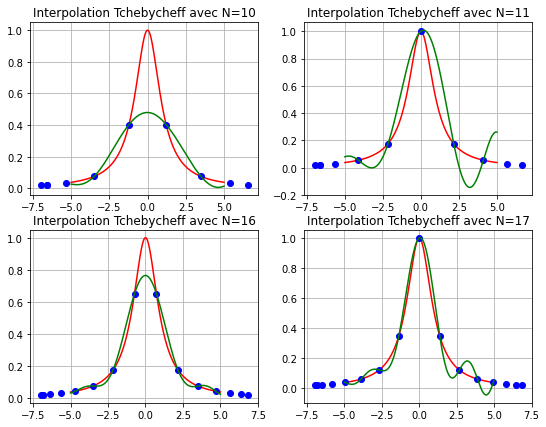

In [32]:
N=10
F=lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
Yt=[F(xx) for xx in Xt]
pt=np.polyfit(Xt,Yt,N-1)
fig = plt.figure(1, figsize=(9, 7))
plt.subplot(221)
plt.plot(t,F(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title('Interpolation Tchebycheff avec N=10')
plt.grid(True)
##########################################
N=11
F=lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
Yt=[F(xx) for xx in Xt]
pt=np.polyfit(Xt,Yt,N-1)
fig = plt.figure(1, figsize=(9, 7))
plt.subplot(222)
plt.plot(t,F(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title('Interpolation Tchebycheff avec N=11')
plt.grid(True)
##########################################
N=16
F=lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
Yt=[F(xx) for xx in Xt]
pt=np.polyfit(Xt,Yt,N-1)
fig = plt.figure(1, figsize=(9, 7))
plt.subplot(223)
plt.plot(t,F(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title('Interpolation Tchebycheff avec N=16')
plt.grid(True)
##########################################
N=17
F=lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
Yt=[F(xx) for xx in Xt]
pt=np.polyfit(Xt,Yt,N-1)
fig = plt.figure(1, figsize=(9, 7))
plt.subplot(224)
plt.plot(t,F(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title('Interpolation Tchebycheff avec N=17')
plt.grid(True)
plt.show()

### <span style="color:#FF336B ">Observation:


**les polynômes d’interpolation aux points de Chebyshev convergent uniformément vers la fonction interpolée lorsqu'on augmente le nombre N de points d’interpolation(d'après le graphe le meilleur cas pour N=17)**

**Conclusion : Les points de Chebyshev donnent des résultat plus précises et meilleurs que celle du phénomène de Runge**

# <span style="color:#2F977B">Exercice3:

**<span style="color:#003194">1)Déterminer en utilisant les deux code le polynôme de Newton pour les données suivantes:**



In [33]:
def intN(x,y):
    m=len(x)
    f=np.zeros(m)
    for k in range(1,m):
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f

In [34]:
x=[-1,0,2,5]
y=[6,1,3,66]
intN(x,y)

array([ 0.        , -5.        ,  0.66666667, 10.5       ])

In [35]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p

In [36]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
intNval(x,y,t)

array([   7., -118.,   27.,  838.])

**<span style="color:#003194">2)Donner le Graphe du polynôme trouvé en 1) dans l'intervalle [-1;5]**



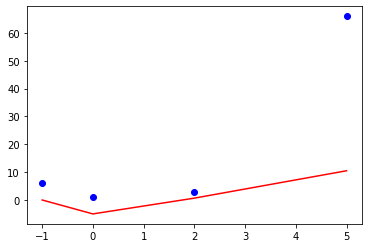

In [37]:
x=[-1,0,2,5]
y=[6,1,3,66]
f=intN(x,y)
plt.plot(x,f,'r',x,y,'ob')
plt.show()

**<span style="color:#003194">3)Calculer $P(1)$ en utilisant le polynôme trouvé en 1).**



In [38]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[0]

7.0

In [39]:
np.__version__

'1.18.5'

In [41]:
%load_ext watermark


In [42]:
%watermark --iversions


numpy 1.18.5

